In [1]:
import pandas as pd 
import numpy as np 
#시각화
import matplotlib.pyplot as plt
import seaborn as sns
#경고무시
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

## 시각화 폰트 설정 함수입니다.

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야함.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당.
a = get_font_family()
# 폰트설정
import matplotlib.pyplot as plt 
plt.rc("font", family = a)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# ggplot으로 그래프 스타일 설정
#plt.style.use("ggplot")

In [2]:
df_ori = pd.read_csv('./data/팀_basline_csv.csv', encoding='utf-8')

In [3]:
df=df_ori.copy()
df.drop('Unnamed: 0', axis=1, inplace=True)
df

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,금요일,주중,1,406
1,El estilo de Claire,beads cropped jacket black,a1140859,2021-01-02,2021-01-15,4days,O,N,금요일,주중,1,13
2,Danha,embroidery point oriental mini skirt blue,a1140859,2021-01-02,2021-01-15,4days,B,N,금요일,주중,1,13
3,Danha,graphics pattern top pink,a1140859,2021-01-02,2021-01-15,4days,T,N,금요일,주중,1,13
4,Burberry London,buckle basic pattern zipup-jumper navy,a1140740,2021-01-01,2021-01-15,7days,O,Y,금요일,주중,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...
1461,Yves Saint Laurent,logo point clutch bag pink,a119721,2019-04-10,2021-03-01,7days,BA,Y,공휴일,휴일,3,691
1462,Prada,saffiano lux M gray,a1146069,2021-02-11,2021-03-01,7days,BA,Y,공휴일,휴일,3,18
1463,Burberry,basic pattern sweater beige,a1147848,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1
1464,Chanel,graphics pattern sweat-shirts white,a1147788,2021-02-28,2021-03-01,7days,T,Y,공휴일,휴일,3,1


>**(1).brandnm: 아이템의 브랜드 이름 컬럼 : 범주형 <br>
(2).goodsnm : 아이템의 특성을 담은 이름 컬럼 : 범주형 <br>
(3). USER : 사용자 ID 컬럼 : 범주형 <br>
(4). reg_date : 사용자 가입일 컬럼 : 날짜형 <br>
(5). order_date : 아이템 주문일 컬럼 : 날짜형<br>
(6). p_type : 주문 상품권 종류 5일 7일 : 범주형<br>
(7). sub_type : 주문 아이템 카테고리 : 범주형 <br>
(8). add_yn : 사용자의 어플리케이션 사용 여부 : 범주형**

# Acquisition

## 어떻게 많은 고객을 서비스로 유입시킬 수 있을 것인가? 

### 1. 전체 브랜드 중 선호도가 높은 순위

In [4]:
# print(df.brandnm.unique())
# print('='*30)
print('클로젯쉐어 전체 브랜드 분류 수 :', len(df.brandnm.unique()))

클로젯쉐어 전체 브랜드 분류 수 : 245


In [5]:
df.groupby('brandnm').count()

,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
brandnm,,,,,,,,,,,
& Other Stories,8,8,8,8,8,8,8,8,8,8,8
A BY A,1,1,1,1,1,1,1,1,1,1,1
A.P.C.,3,3,3,3,3,3,3,3,3,3,3
ACNE STUDIOS,4,4,4,4,4,4,4,4,4,4,4
Adidas,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
Zooc,2,2,2,2,2,2,2,2,2,2,2
cecilie bahnsen,1,1,1,1,1,1,1,1,1,1,1
khrisjoy,1,1,1,1,1,1,1,1,1,1,1


In [6]:
# 구매가 많은 상위 10개 브랜드
df.brandnm.value_counts().sort_values(ascending=False).head(10)

Gucci                 230
Chanel                 90
Saint Laurent          86
Louis Vuitton          79
Prada                  58
Burberry               53
Yves Saint Laurent     38
Thom Browne            33
Mixed                  29
Celine                 28
Name: brandnm, dtype: int64

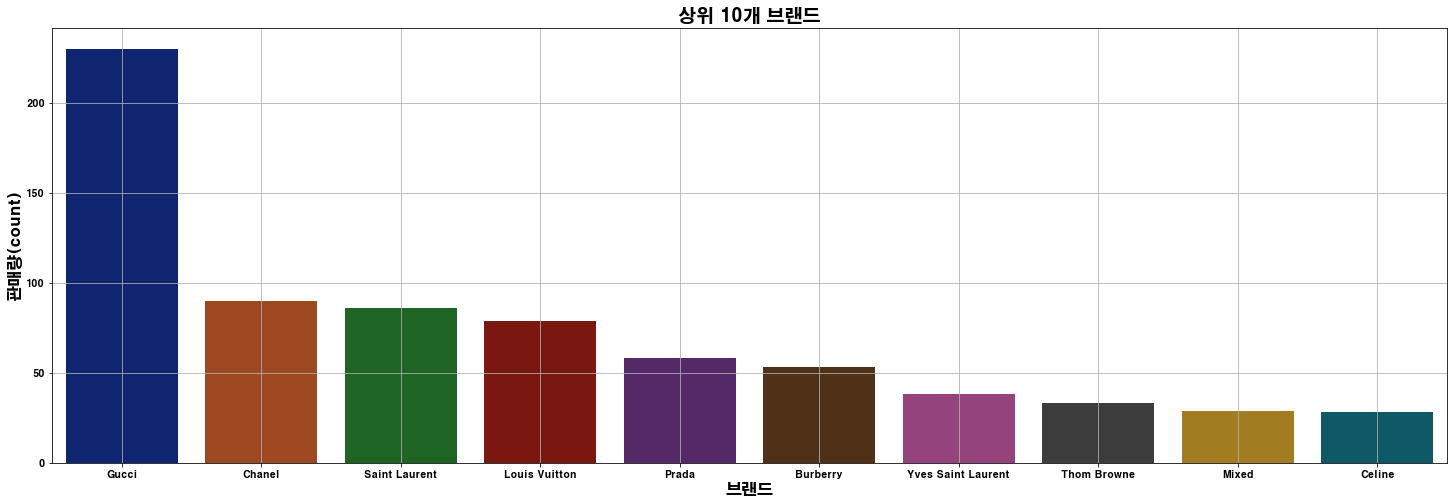

In [7]:
plt.rcParams['font.family'] = 'HYGothic-Extra'

best_br = df.brandnm.value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(25,8))
sns.barplot(best_br.index, best_br.values, palette='dark')
plt.grid()
plt.title('상위 10개 브랜드', fontsize=18)
plt.ylabel('판매량(count)', fontsize=16)
plt.xlabel('브랜드', fontsize=16)
plt.show()

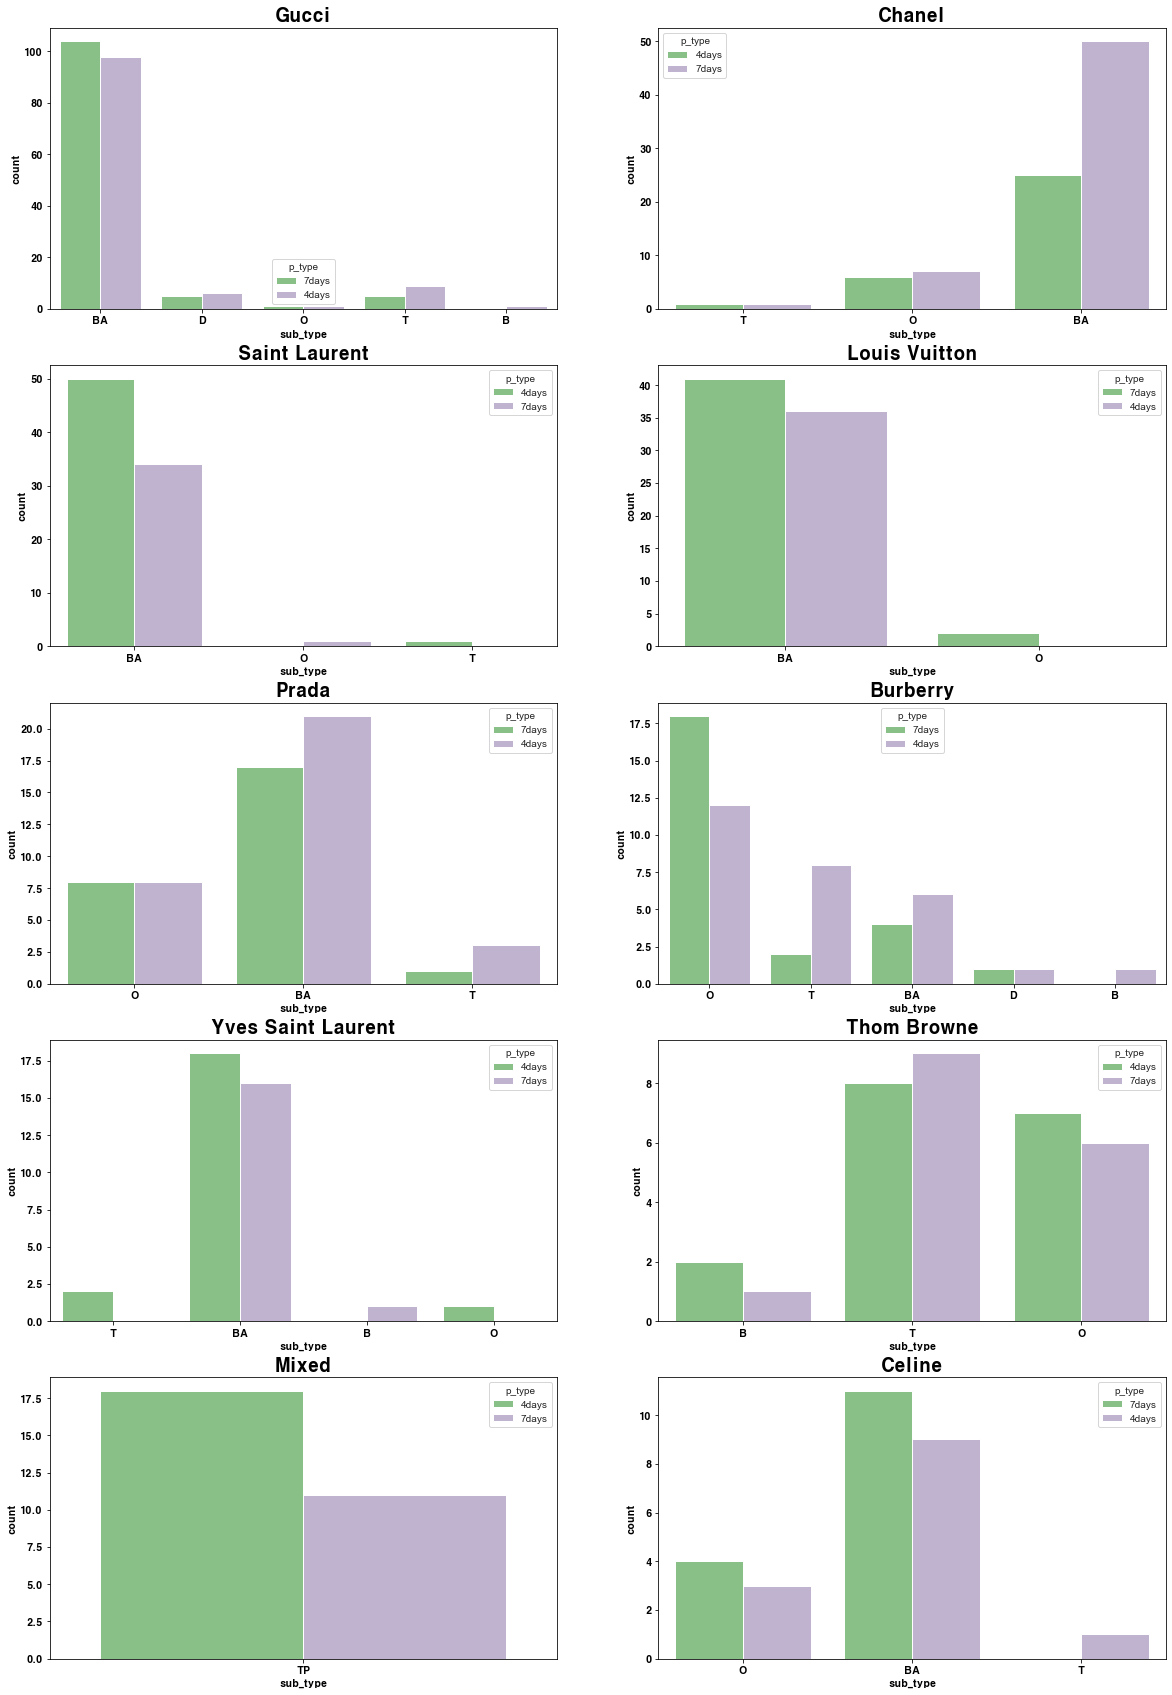

In [8]:
# 상위 10개 브랜드 sub_type 분포
# br = list(df.brandnm.value_counts().sort_values(ascending=False).head(30))
br = list(df.brandnm.value_counts().sort_values(ascending=False).head(10).index)

f, ax = plt.subplots(5,2 , figsize = (20,30))
axx = ax.flatten()
plt.rcParams['font.family'] = 'HYGothic-Extra'

for axx2, j in zip(axx, br) :
    sns.set_style('whitegrid')
    plt.subplot(axx2)
    b_ca = df[df['brandnm'] == j]
    sns.countplot(data = b_ca, x= 'sub_type', hue='p_type', palette='Accent', ax= axx2)
    plt.title(j, fontsize = 18)

### - Top1 : Gucci 데이터만 따로 보기

In [9]:
# gucci 데이터만 따로 보기
gucci = df.query('brandnm == "Gucci"')[:]
gucci

,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,Gucci,flower dionysus shoulder bag beige,a161237,2019-12-06,2021-01-15,7days,BA,Y,금요일,주중,1,406
8,Gucci,dionysus cross bag,a1143028,2021-01-14,2021-01-15,4days,BA,Y,금요일,주중,1,1
16,Gucci,microssima mini cross body bag pink,a1142921,2021-01-14,2021-01-14,4days,BA,Y,목요일,주중,1,0
34,Gucci,padlock GG canvas shoulder bag,a143862,2019-09-29,2021-01-14,4days,BA,Y,목요일,주중,1,473
36,Gucci,flap cross bag black,a1141099,2021-01-04,2021-01-13,4days,BA,Y,수요일,주중,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...
1445,Gucci,super mini sylvie white,a1144433,2021-01-25,2021-03-02,7days,BA,Y,화요일,주중,3,36
1447,Gucci,vintage web GG two way bag brown,a1117218,2020-08-30,2021-03-02,7days,BA,Y,화요일,주중,3,184
1451,Gucci,sylvie mini chain ribbon bag red,a1147961,2021-03-01,2021-03-01,4days,BA,Y,공휴일,휴일,3,0
1452,Gucci,microssima emily mini bag black,a1147942,2021-03-01,2021-03-01,7days,BA,Y,공휴일,휴일,3,0


In [10]:
def show_brands(brand):
    f, ax  = plt.subplots(2,2,figsize=(15,10))
    plt.rcParams['font.family'] = 'HYGothic-Extra'


    plt.subplot(221)
    sns.countplot(data=brand, x='days', order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
    plt.title('요일별 주문 건수')

    plt.subplot(222)
    sns.countplot(data=brand, x='p_type', order=['4days', '7days'])
    plt.title('p_type별 주문건')

    plt.subplot(223)
    sns.countplot(data=brand, x='sub_type')
    plt.title('sub_type별 주문건')

    plt.subplot(224)
    sns.countplot(data=brand, x='days', hue='app_yn', order=['월요일','화요일','수요일','목요일','금요일','토요일','일요일', '공휴일'])
    plt.title('요일별 앱 유입여부')

    plt.suptitle(str(brand['brandnm'][0]) + ' 상품 이용객 분류',fontsize=30, fontweight = 'bold')
    plt.show()

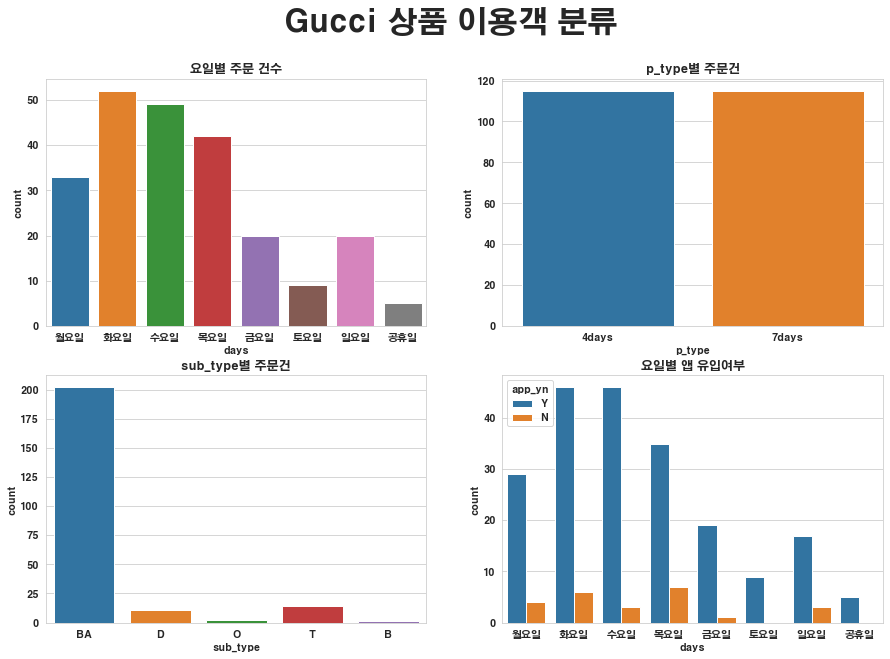

In [11]:
show_brands(gucci)

### - Top2 : Chanel 데이터만 따로 보기

In [12]:
Chanel = df.query('brandnm == "Chanel"')[:]
Chanel.reset_index(inplace=True)
Chanel

,index,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,28,Chanel,brooch stripe pattern turtle neck turtleneck navy,a1136028,2020-12-09,2021-01-14,4days,T,Y,목요일,주중,1,36
1,58,Chanel,pocket tweed pattern cashmere coat pink,a1138513,2020-12-20,2021-01-11,4days,O,Y,월요일,주중,1,22
2,98,Chanel,classic chain shoulder bag black,a1141379,2021-01-06,2021-01-06,7days,BA,Y,수요일,주중,1,0
3,103,Chanel,pocket basic pattern wool fullzip-jacket grey,a1141288,2021-01-05,2021-01-06,4days,O,Y,수요일,주중,1,1
4,135,Chanel,pocket graphics pattern zipup-jumper navy,a1112031,2020-08-15,2021-01-01,7days,O,N,공휴일,휴일,1,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1450,Chanel,stripe pattern pointed cardigan multi,a1147961,2021-03-01,2021-03-01,4days,O,Y,공휴일,휴일,3,0
86,1453,Chanel,boy chanel clutch black,a1147960,2021-03-01,2021-03-01,7days,BA,Y,공휴일,휴일,3,0
87,1455,Chanel,brooch check pattern jacket cream,a1146108,2021-02-11,2021-03-01,7days,O,Y,공휴일,휴일,3,18
88,1456,Chanel,pocket tweed pattern cashmere coat pink,a1147959,2021-03-01,2021-03-01,7days,O,N,공휴일,휴일,3,0


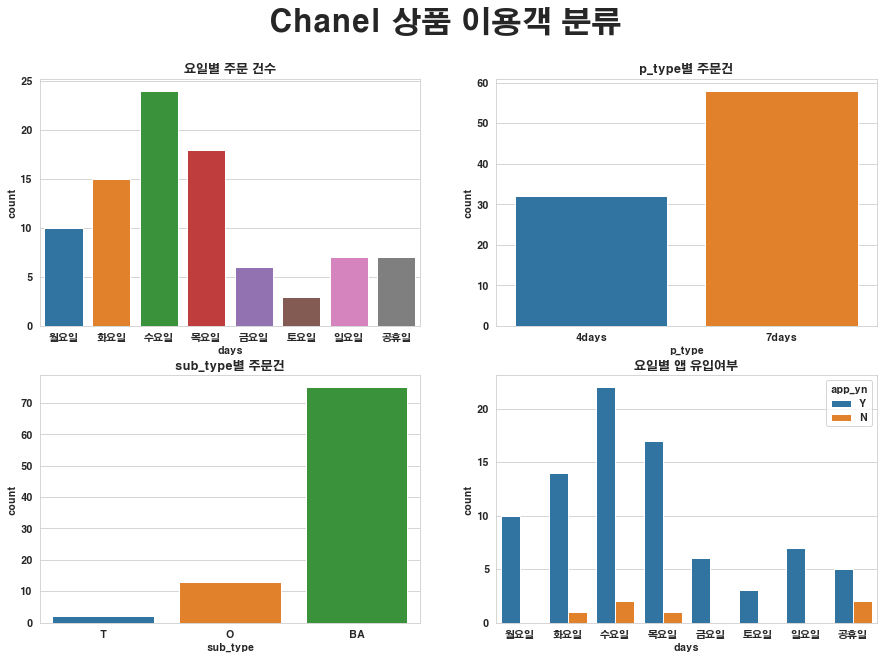

In [13]:
show_brands(Chanel)

### - Top3 : Saint Laurent 데이터만 따로 보기

In [14]:
S_Laurent = df.query('brandnm == "Saint Laurent"')[:]
S_Laurent.reset_index(inplace=True)
S_Laurent

,index,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,45,Saint Laurent,chevron quilted cross bag black,a1140871,2021-01-02,2021-01-13,4days,BA,Y,수요일,주중,1,11
1,51,Saint Laurent,chevron quilted cross bag black,a1141925,2021-01-09,2021-01-12,4days,BA,Y,화요일,주중,1,3
2,56,Saint Laurent,mini sunset chain bag black,a1142471,2021-01-12,2021-01-12,7days,BA,Y,화요일,주중,1,0
3,67,Saint Laurent,button basic pattern blazer black,a1140758,2021-01-01,2021-01-10,7days,O,Y,일요일,휴일,1,9
4,115,Saint Laurent,quilted calfskin shoulder bag,a1139320,2020-12-22,2021-01-05,7days,BA,Y,화요일,주중,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,1311,Saint Laurent,chevron quilted cross bag black,a1135400,2020-12-05,2021-03-09,4days,BA,Y,화요일,주중,3,94
82,1320,Saint Laurent,monogram mini universal bag black,a1148747,2021-03-09,2021-03-09,7days,BA,Y,화요일,주중,3,0
83,1357,Saint Laurent,chevron quilted cross bag black,a1148129,2021-03-03,2021-03-06,7days,BA,N,토요일,휴일,3,3
84,1377,Saint Laurent,quilted calfskin shoulder bag,a1148237,2021-03-04,2021-03-04,4days,BA,N,목요일,주중,3,0


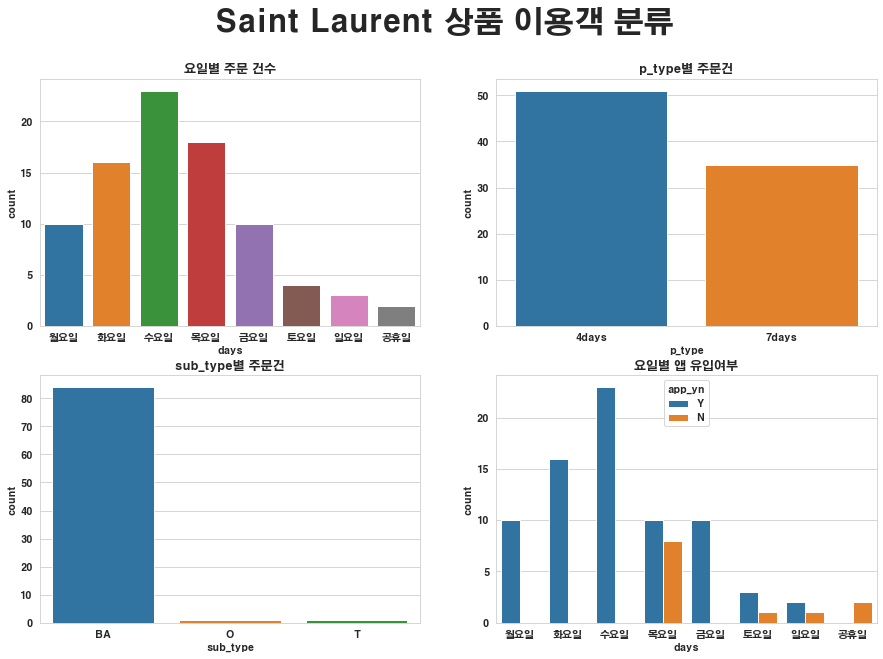

In [15]:
show_brands(S_Laurent)

### - Top4 : Louis Vuitton 데이터만 따로 보기

In [16]:
Louis_Vuitton = df.query('brandnm == "Louis Vuitton"')[:]
Louis_Vuitton.reset_index(inplace=True)
Louis_Vuitton

,index,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,10,Louis Vuitton,twist monogram patent shoulder bag black,a1140216,2020-12-28,2021-01-15,7days,BA,Y,금요일,주중,1,18
1,44,Louis Vuitton,monogram shoulder bag black,a164734,2019-12-13,2021-01-13,4days,BA,Y,수요일,주중,1,397
2,73,Louis Vuitton,alma epi pm tote bag black,a1141816,2021-01-09,2021-01-09,7days,BA,Y,토요일,휴일,1,0
3,91,Louis Vuitton,monogram clutch brown,a1141530,2021-01-07,2021-01-07,7days,BA,Y,목요일,주중,1,0
4,144,Louis Vuitton,logo chain tote bag black,a1144704,2021-01-27,2021-01-30,4days,BA,Y,토요일,휴일,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1325,Louis Vuitton,verni mini clutch chain bag brown,a1138484,2020-12-20,2021-03-09,7days,BA,Y,화요일,주중,3,79
75,1332,Louis Vuitton,monogram clutch brown,a1148708,2021-03-09,2021-03-09,4days,BA,Y,화요일,주중,3,0
76,1384,Louis Vuitton,galliera gm Shoulder hobo Bag white,a1148221,2021-03-04,2021-03-04,7days,BA,Y,목요일,주중,3,0
77,1417,Louis Vuitton,Pochette trunk vertical black bag,a1148115,2021-03-03,2021-03-03,4days,BA,Y,수요일,주중,3,0


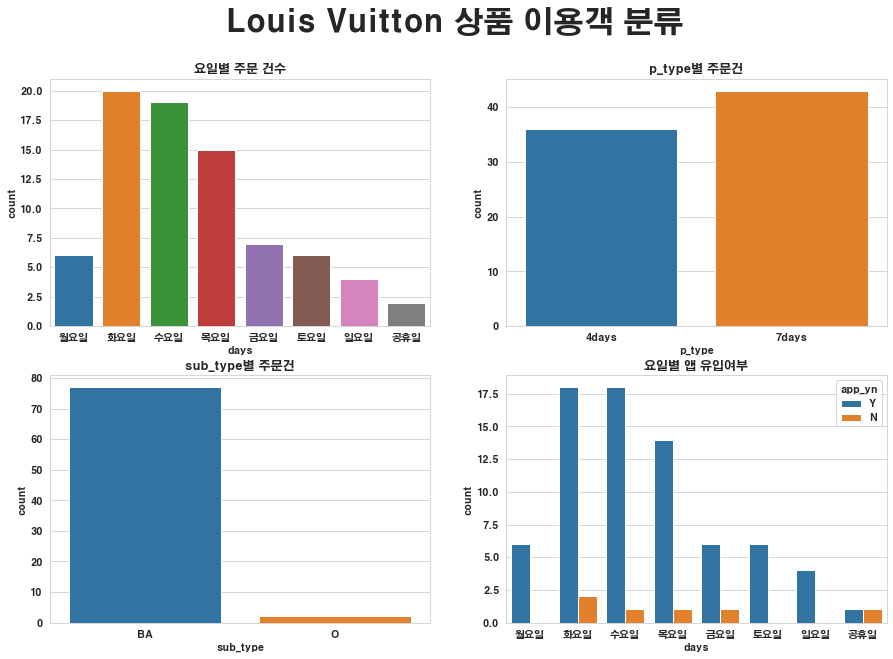

In [17]:
show_brands(Louis_Vuitton)

### - Top5 : Prada 데이터만 따로 보기

In [18]:
Prada = df.query('brandnm == "Prada"')[:]
Prada.reset_index(inplace=True)
Prada

,index,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,5,Prada,ruffle detail long coat,a110231,2018-10-18,2021-01-15,7days,O,Y,금요일,주중,1,820
1,12,Prada,color fur detail coat black,a1137815,2020-12-18,2021-01-15,7days,O,Y,금요일,주중,1,28
2,13,Prada,zipper detail cape padding jumper,a1135135,2020-12-04,2021-01-15,7days,O,Y,금요일,주중,1,42
3,15,Prada,logo hobo bag black,a1143143,2021-01-15,2021-01-15,4days,BA,Y,금요일,주중,1,0
4,30,Prada,quilted cross body bag black,a1142924,2021-01-14,2021-01-14,4days,BA,Y,목요일,주중,1,0
5,37,Prada,single button modern coat black,a1142328,2021-01-11,2021-01-13,4days,O,Y,수요일,주중,1,2
6,48,Prada,collar point long coat multi,a189599,2020-03-22,2021-01-13,7days,O,Y,수요일,주중,1,297
7,53,Prada,button check pattern wool singlebreasted-jacke...,a1120719,2020-09-21,2021-01-12,4days,O,Y,화요일,주중,1,113
8,123,Prada,padding two way bag black,a1141018,2021-01-04,2021-01-04,4days,BA,Y,월요일,주중,1,0
9,171,Prada,logo hobo bag black,a1135097,2020-12-04,2021-01-28,4days,BA,Y,목요일,주중,1,55


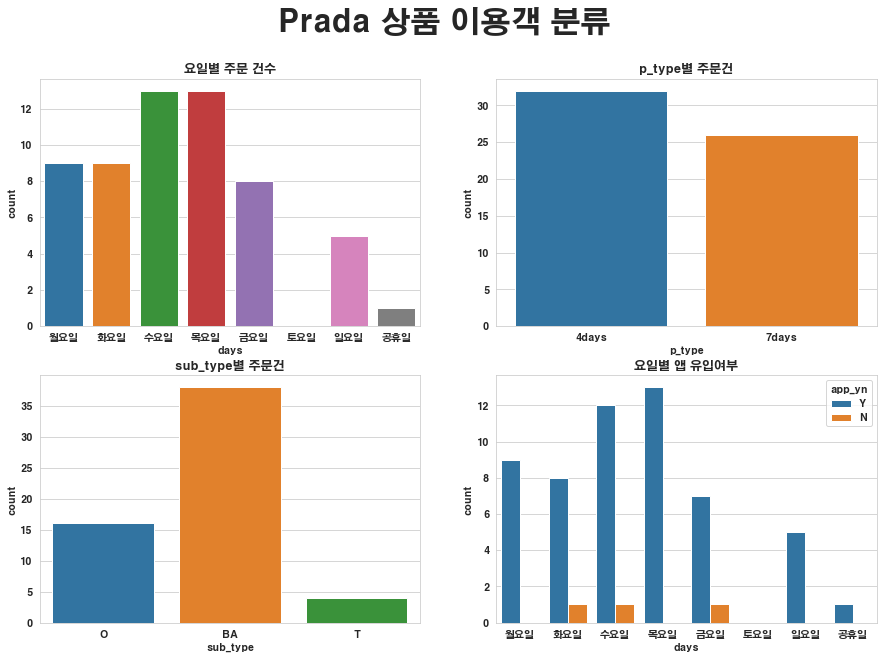

In [19]:
show_brands(Prada)

### - Top6 : Burberry 데이터만 따로보기

In [20]:
Burberry = df.query('brandnm == "Burberry"')[:]
Burberry.reset_index(inplace=True)
Burberry

,index,brandnm,goodsnm,USER,reg_date,order_date,p_type,sub_type,app_yn,days,day_type,month,How_long
0,26,Burberry,shawl collar double coat,a1142679,2021-01-13,2021-01-14,7days,O,Y,목요일,주중,1,1
1,120,Burberry,belt basic pattern trench-coat red,a1119528,2020-09-14,2021-01-04,4days,O,Y,월요일,주중,1,112
2,145,Burberry,button basic pattern top black,a1144704,2021-01-27,2021-01-30,4days,T,Y,토요일,휴일,1,3
3,148,Burberry,high neck design long coat brown,a187236,2020-03-08,2021-01-30,7days,O,Y,토요일,휴일,1,328
4,182,Burberry,tb leather belt bag black,a1144350,2021-01-24,2021-01-27,4days,BA,Y,수요일,주중,1,3
5,209,Burberry,button basic pattern wool coat brown,a1143880,2021-01-20,2021-01-26,4days,O,Y,화요일,주중,1,6
6,221,Burberry,classic cross bag black,a1144470,2021-01-25,2021-01-26,4days,BA,Y,화요일,주중,1,1
7,234,Burberry,button Quilting pattern padding-outer beige,a167357,2019-12-20,2021-01-25,7days,O,Y,월요일,주중,1,402
8,257,Burberry,button basic pattern wool jacket black,a1143701,2021-01-18,2021-01-22,4days,O,Y,금요일,주중,1,4
9,270,Burberry,belt check pattern trench-coat beige,a1142838,2021-01-13,2021-01-21,7days,O,Y,목요일,주중,1,8


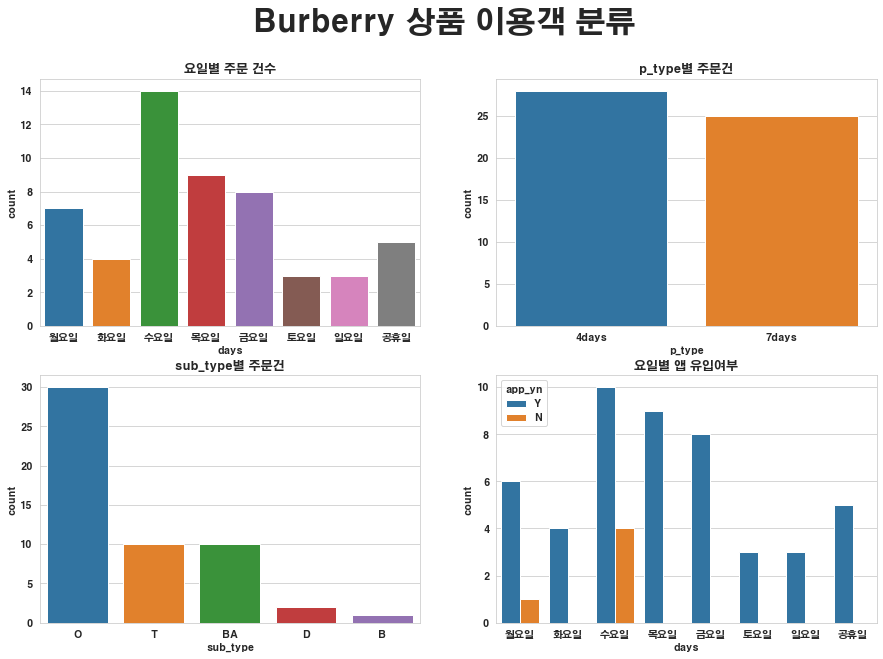

In [21]:
show_brands(Burberry)

### - Top7 : Yves Saint Laurent 데이터만 따로보기

In [22]:
Laurent = df.query('brandnm == "Yves Saint Laurent"')[:]
Laurent.reset_index(inplace=True)

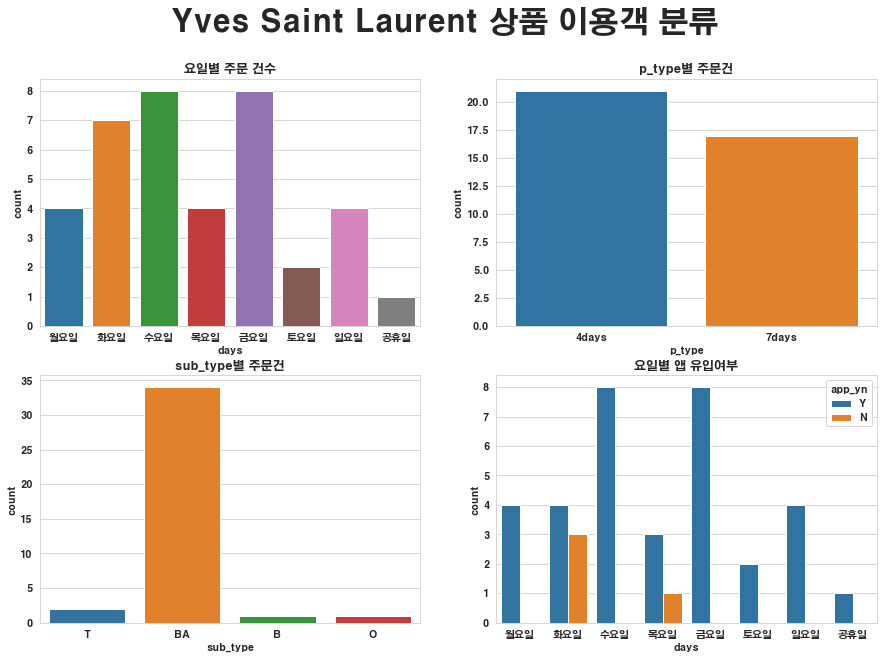

In [23]:
show_brands(Laurent)

### - Top8 : Thom Browne 데이터만 따로보기

In [24]:
Thome_Browne = df.query('brandnm == "Thom Browne"')[:]
Thome_Browne.reset_index(inplace=True)

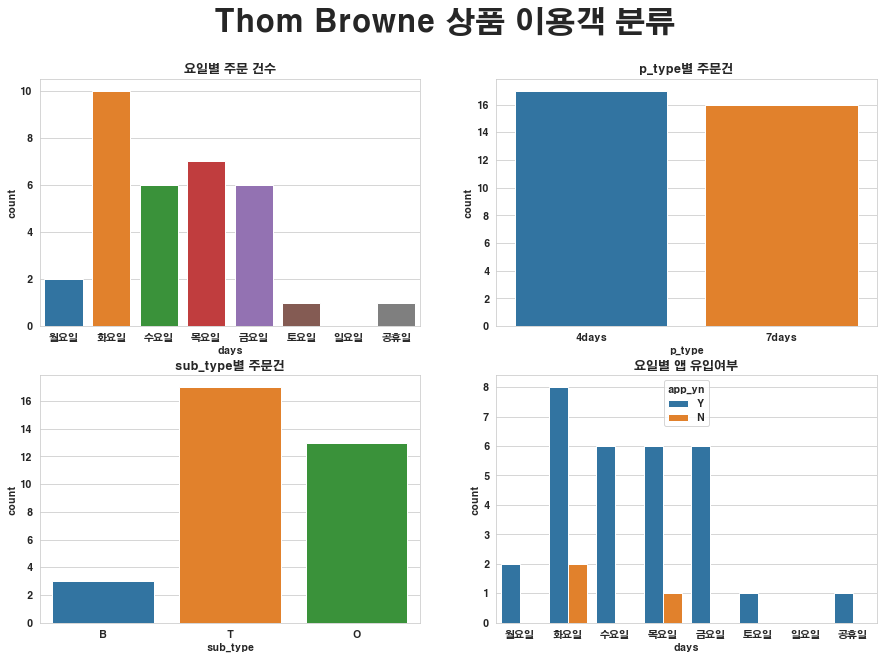

In [25]:
show_brands(Thome_Browne)

### - Top9 : Mixed 데이터만 따로보기

In [26]:
Mixed = df.query('brandnm == "Mixed"')[:]
Mixed.reset_index(inplace=True)

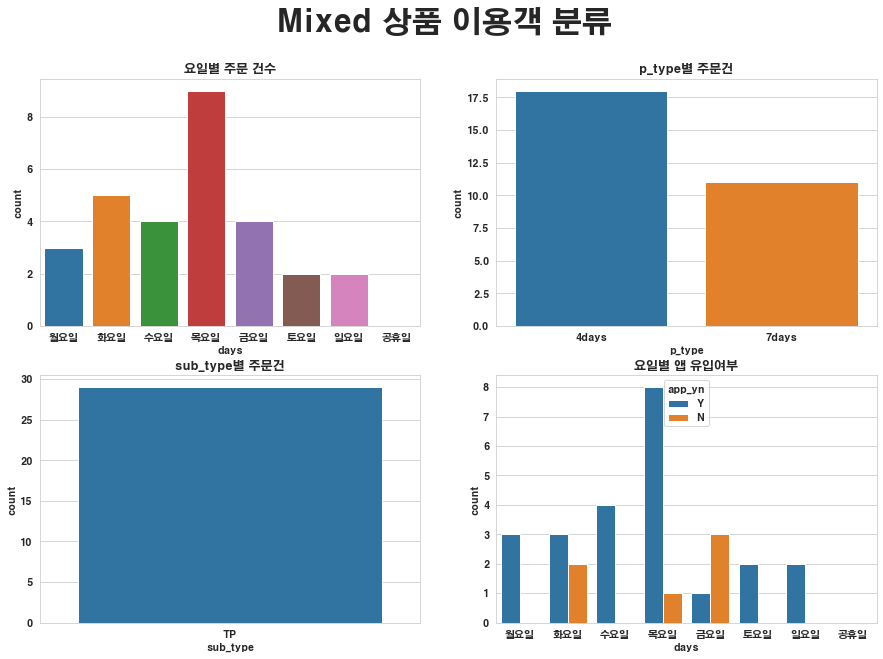

In [27]:
show_brands(Mixed)

### - Top10 : Celine 데이터만 따로보기

In [28]:
Celine = df.query('brandnm == "Celine"')[:]
Celine.reset_index(inplace=True)

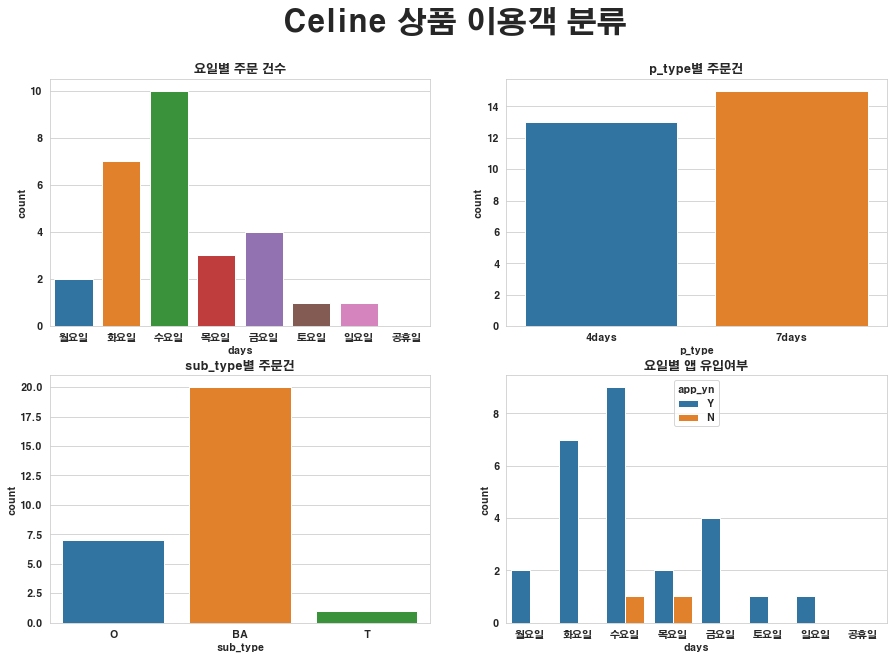

In [29]:
show_brands(Celine)

### Top 10 요약

**1. 요일별 주문 건수**
- Gucci : 화-수-목-월-금/일-토-공휴일
- Chanel : 수-목-화-월-일/공휴일 - 토
- Saint Laurent : 수-목-화-월/금-토-일-공휴일
- Louis Vuitton : 화-수-목-금-월/토-일-공휴일
- Prada : 수/목-월/화-금-일-공휴일
- Burberry : 수-목-금-월-공휴일-화-토/일
- Yves Saint Laurent : 수/금-화-월/목/일-토-공휴일
- Thom Browne : 화-목-수/금-월-공휴일-토
- Mixed : 목-화-수/금-월-토/일
- Celine : 수-화-금-목-월-토/일

**2. p_type건 주문건**
- 4 < 7 : Chanel, Louis Vuitton, Celine
- 4 > 7 : Saint Laurent, Prada, Burberry, Yves Saint Laurent, Thom Browne, Mixed
- 4 = 7 : Gucci


**3. sub_type별 주문건**
- Gucci : BA >>> T > D > O/B
- Chanel : BA >>> O > T
- Saint Laurent :  BA >>>>>>> 0/T
- Louis Vuitton : BA >>>>>>>>>>> O
- Prada : BA >>> O >> T
- Burberry : O >> T/BA > D > B
- Yves Saint Laurent : BA >>>>>>>> T > B/O
- Thom Browne : T > O >> B
- Mixed : TP(Only)
- Celine : BA >>> O > T

**4. 요일별 앱 유입 여부(Yes)**
- Gucci : 화/수-목-월-금-일-토-공휴일
- Chanel : 수-목-화-월-일-금-공휴일-토
- Saint Laurent : 수-화-월/목/금-토-일-공휴일
- Louis Vuitton : 화/수-목-월/금/토-일-공휴일
- Prada : 목-수-월-화-금-일-공
- Burberry : 수-목-금-월-공휴일-화-일-토
- Yves Saint Laurent : 수/금-월/화/일-목-토-공휴일
- Thom Browne : 화-수/목/금-월-토/공휴일
- Mixed : 목-수-월-화-토/일-금
- Celine : 수-화-금-월/목-토/일

## 2. 전체 아이템 중 선호도가 높은 순위 기준

In [30]:
## 월별 분석
df_month_1 = df[df['month']==1]
df_month_2 = df[df['month']==2]
df_month_3 = df[df['month']==3]

In [31]:
# 주중 데이터 중 1월 이용자가 가장 선호하는 카테고리 top 5
df_month_1['sub_type'].value_counts().head(5)

BA    147
O      82
D      64
T      60
B      11
Name: sub_type, dtype: int64

In [32]:
# 주중 데이터 중 2월 이용자가 가장 선호하는 카테고리 top 5
df_month_2['sub_type'].value_counts().head(5)

BA    232
O      97
D      69
T      39
B       9
Name: sub_type, dtype: int64

In [33]:
# 주중 데이터 중 3월 이용자가 가장 선호하는 카테고리 top 5
df_month_3['sub_type'].value_counts().head(5) # 3월에 D가 O를 역전

BA    309
D     128
O      87
T      65
B      38
Name: sub_type, dtype: int64

In [34]:
# 개별 아이템별 선호도 상품 분석 

best_item = list(df.goodsnm.value_counts().head(11).index)
cnt = list(df.goodsnm.value_counts().head(11).values)

In [35]:
for i in range(len(best_item)):
    bname = df[df.goodsnm == best_item[i]]['brandnm'].unique()
    print(bname, ':', best_item[i], '주문수량', cnt[i])

['Saint Laurent'] : chevron quilted cross bag black 주문수량 23
['Chanel'] : classic clutch black 주문수량 12
['Chanel'] : boy chanel clutch black 주문수량 11
['Gucci'] : padlock GG canvas shoulder bag 주문수량 9
['Louis Vuitton'] : epi tote bag black 주문수량 8
['Saint Laurent'] : mini sunset chain bag black 주문수량 8
['Gucci'] : dionysus shoulder bag beige 주문수량 8
['Gucci'] : dionysus cross bag beige 주문수량 7
['Saint Laurent' 'Chanel'] : quilted shoulder bag black 주문수량 7
['Gucci'] : flap cross bag black 주문수량 7
['Louis Vuitton'] : monogram clutch brown 주문수량 7


In [36]:
# 월별/요일별/ 개별 아이템 사진첨부 

# 상위 아이템 분석

- ['Saint Laurent'] : chevron quilted cross bag black 주문수량 23
- ['Chanel'] : classic clutch black 주문수량 12
- ['Chanel'] : boy chanel clutch black 주문수량 11

In [37]:
cross_bag = df.query('goodsnm == "chevron quilted cross bag black"')
cluth_black = df.query('goodsnm == "classic clutch black"')
chanel_cluth = df.query('goodsnm == "boy chanel clutch black"')

## 월별 count

In [38]:
def high_items(x):
    plt.figure(figsize=(20,7))
    plt.rcParams['font.family'] = 'HYGothic-Extra'

    plt.subplot(131)
    sns.countplot(data=cross_bag, x=x)
    plt.title('Saint Laurent - chevron quilted cross bag black 월별 count')

    plt.subplot(132)
    sns.countplot(data=cluth_black, x=x)
    plt.title('Chanel - classic cluth black 월별 count')

    plt.subplot(133)
    sns.countplot(data=chanel_cluth, x=x)
    plt.title('Chanel - boy chanel cluth black 월별 count')

    plt.suptitle('상위 제품 3개 월별 count',fontsize=30, fontweight = 'bold')
    plt.show()

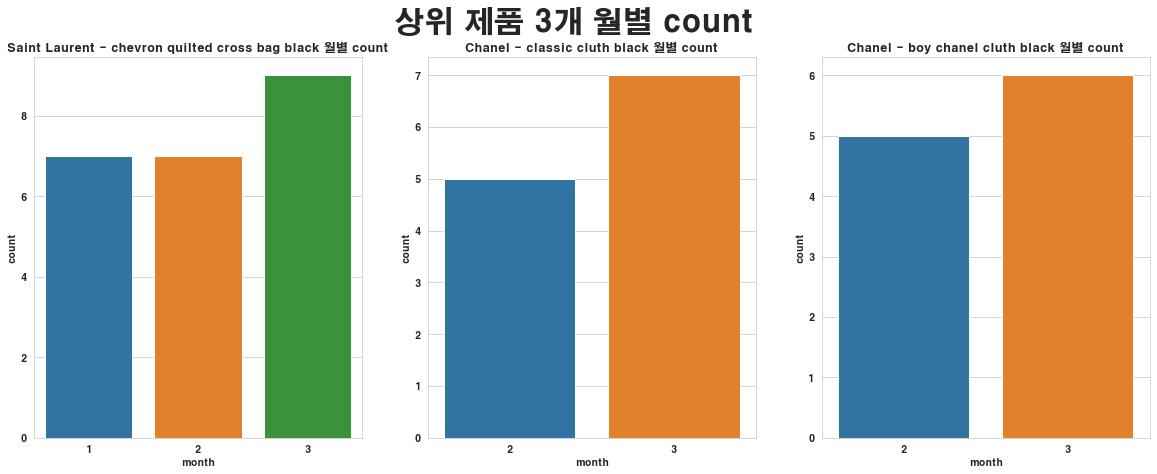

In [39]:
high_items('month')

- 생로랑은 1 = 2 < 3월
- 샤넬은 1월달 데이터가 없음. 두 제품 모두 2 < 3
    - 그렇다면 chanel 제품들은 2월에 업데이트 된 상품이 아닐까? 라는 추측을 해봄

## 요일별 count

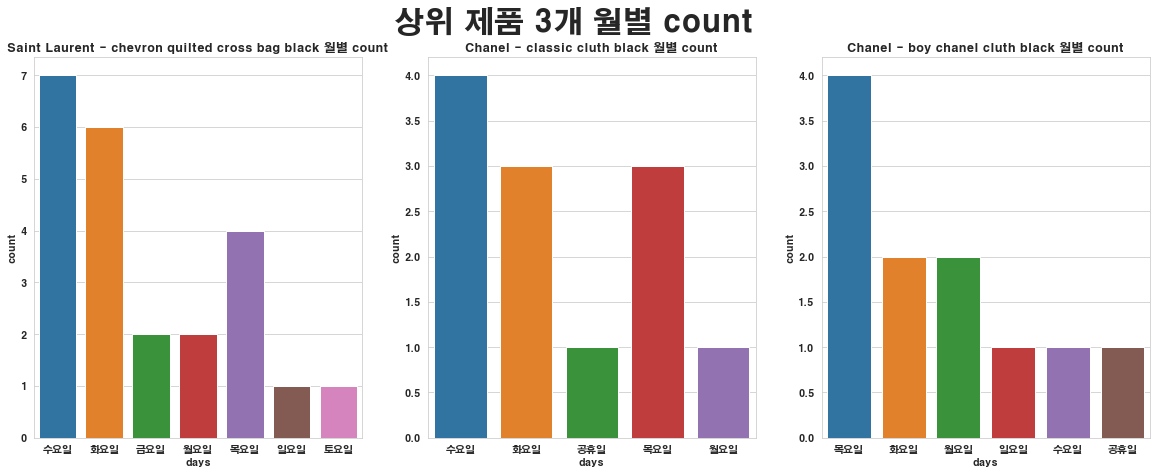

In [40]:
high_items('days')

## 주중/휴일별 아이템 분석

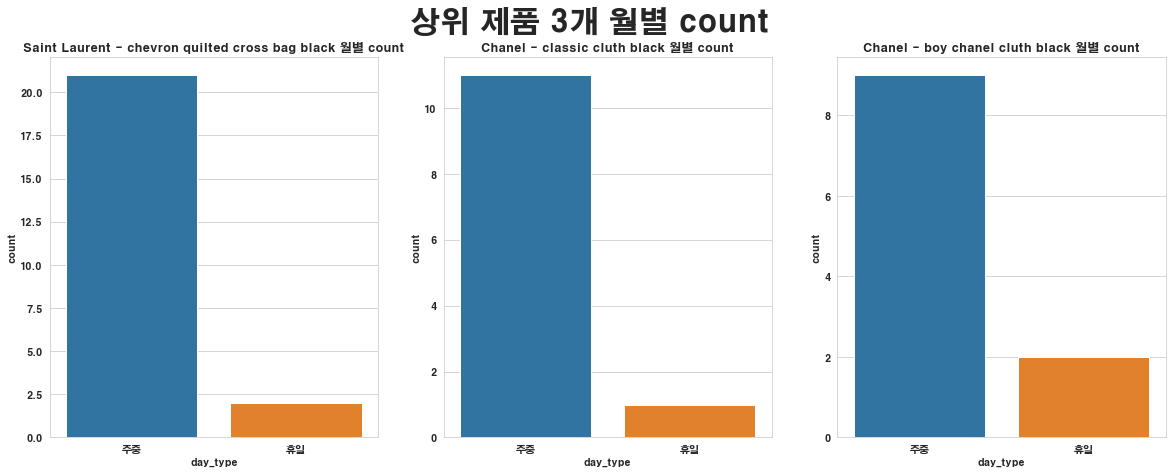

In [41]:
high_items('day_type')

## 가입 후 기간별 아이템 분석

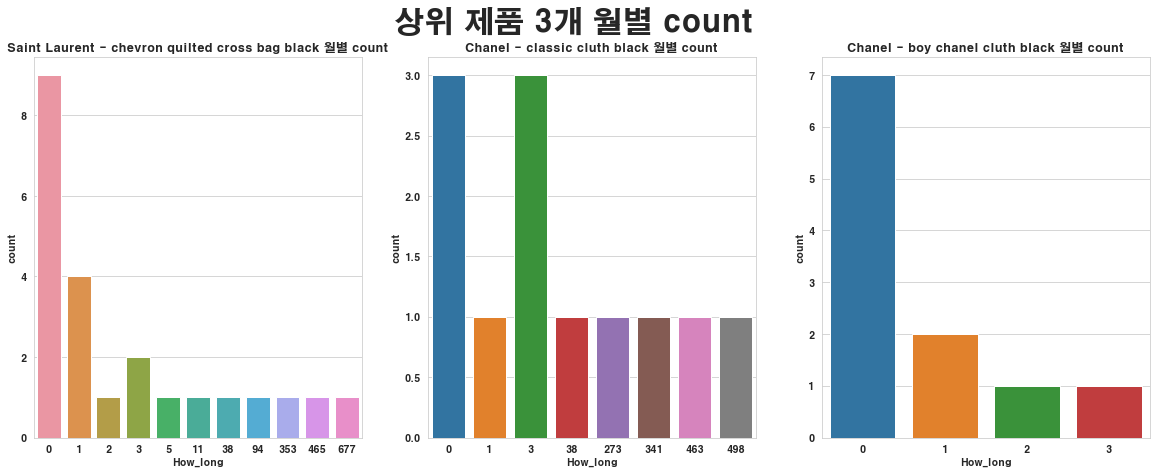

In [42]:
high_items('How_long')

- 대부분이 가입 당일 혹은 1일 이내에 빌림

In [43]:
print(cluth_black[cluth_black['How_long'] > 1]['order_date'], '\n')
print(cluth_black[cluth_black['How_long'] > 1]['order_date'].min())

464     2021-02-24
649     2021-02-13
741     2021-02-04
839     2021-03-31
973     2021-03-25
978     2021-03-24
1309    2021-03-09
1333    2021-03-09
Name: order_date, dtype: object 

2021-02-04


In [44]:
print(chanel_cluth[chanel_cluth['How_long'] > 1]['order_date'], '\n')
print(chanel_cluth[chanel_cluth['How_long'] > 1]['order_date'].min())

750     2021-02-04
1192    2021-03-16
Name: order_date, dtype: object 

2021-02-04


### idea?

- 아까 위에서 chanel 제품들은 2월에 들어온 상품이 아닐까? 란 가정을 세웠는데,<br> 가입한 지 꽤 된 유저들의 구매일자를 확인해보니 모두 2,3월임 이 중 가장 빠른 결제일이 **2월 4일**
- 샤넬의 두 번째 제품도 마찬가지임. 가장 빠른 결제일이 **2월 4일**
- **상위 제품 2,3위인 샤넬의 제품은 2월에 업데이트 된 것으로 판단**
    - 신상에 대한 욕구 有?
        - 이게 진짜 시즌 신상인지, 아니면 클로젯 셰어 내에서의 신상일지 판단 확인 필요
        - 클로젯 셰어에서 검색한 결과, 동일 제품인데 new 라벨이 붙어있는 제품 존재. **클로젯 셰어 내부에서의 신상(재고가 추가됨)으로 판단**
        
- 상위 3개 제품의 디자인은 모두 **베이직한 디자인**임. 게다가 모두 **검정색**
    - *클로젯 셰어 인스타그램에 베스트 셀러 bags들을 모아놨는데 ..... 음.. 어떻게 연결지을 수 있을까요*
    - 클로젯 셰어 인스타그램 주소 : https://www.instagram.com/closetshare_kr/
        - 게시글 보려면 로그인 필수

## 일회권 별 count

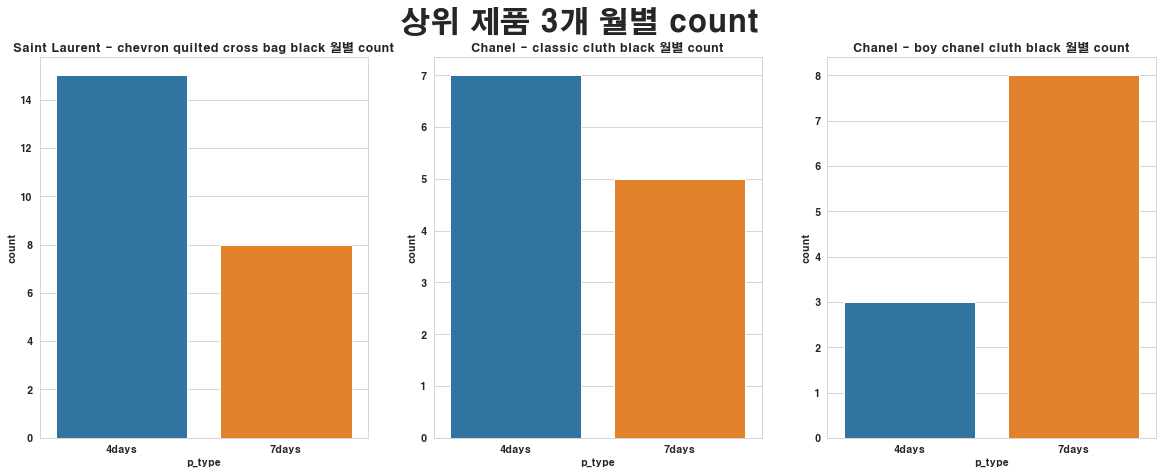

In [45]:
high_items('p_type')

- 생로랑과 샤넬 classicd cluth black 제품은 4days가 많고, boy chanel cluth black은 7days가 많음
    - 같은 브랜드의 아이템인데 왜 차이가 있을까?
        - chanel classic clutch black : 39000/49000원 多 (15개 존재)
        - boy chanel cluth black : 49000/59000 (1개 존재)
           - 가격은 비슷한데? 재고 수의 차이 때문일까?